In [13]:
import mlrose_hiive
import numpy as np

from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from matplotlib import pyplot as plt
from numpy import inf
import time

In [14]:
# Generate a new TSP problem using a fixed seed.
problem_fit = TSPGenerator().generate(seed=123456, number_of_cities=40)

In [15]:
# Solve problem using the genetic algorithm
#GA POPSIZE = 200
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=200)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

2.606696605682373
[ 3 16  8 14 24 22 33  4 31 25 39 10 26 36 13  1 34 21 28 18  0 12  5 20
 11 38  7 17  9 15 19 30 32 37  6  2 35 29 23 27]
2413.4596542154422


In [16]:
curve_GA = fitness_curve
fitness_GA = best_fitness

In [4]:
#GA POPSIZE = 250
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=250)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

1.6968092918395996
[20  5 13 34 28  6  2 36 37 38 11 25 31 10  4 27 24 14 17  9 15 30  7 19
 16 23 12 35 39 22  0  3  8 33  1 21 18 29 32 26]
2416.310341871329


In [5]:
#GA POPSIZE = 150
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=50)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.3421926498413086
[ 1 20 24  7  4 30 22  6 38 16 23 33 34 13 28  5 29 32  2 35 26 36 11  8
  3 27 17 15 14  9 19 31 25  0 12 37 10 39 21 18]
2726.6655660680804


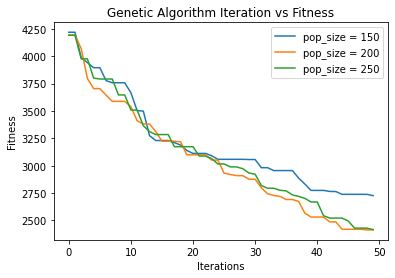

In [6]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Genetic Algorithm Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [9]:
#RCH RESTARTS=0
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=0, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.00949549674987793
[16 27 33  4  7 30 26 39 17 22 38 32 24  9 14  2  6  1 25 19 15 10 31  0
  3 20  5 13 34 36 35 21 28 11 12 23 18  8 37 29]
3536.9845549875727


In [5]:
#RCH RESTARTS=10
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=10, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.11966395378112793
[ 3 27  0 39 31 24 30 25 11  2 37 10 26 36 35  6 28 21 23 16 20  5 17 19
  9 38 34 13 18  1 32 29 15 14  4  7 22 33  8 12]
2979.7096183028484


In [6]:
curve_RHC = fitness_curve_pro
fitness_RHC = best_fitness

In [11]:
#RCH RESTARTS=5
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=5, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.043595075607299805
[36  5 13  3  4 27  8 18 34 28 12 19 30 38 32 10 31 15 35 26 37 17  7 22
 14 24  9 33 23  0 16  2 29  1 20 21 39 25 11  6]
3150.647888531186


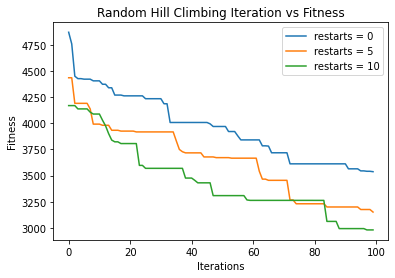

In [12]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='restarts = 5')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='restarts = 10')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Random Hill Climbing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [15]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.07054686546325684
[ 5 12 33 23  8  4 27  7 17 14 15 24  9 39 35 10 25 31 26 32 30 19 22 11
 21  1 18 34 13 20 28 29 16  0  3 38 36 37  2  6]
2020.9980783001752


In [16]:
#SA schedule = arithdecay
start = time.time()
schedule = mlrose_hiive.ArithDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, schedule=schedule, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.08652997016906738
[ 2  1 18 34 20  5 30 19 24  9 17  3  0 12 23  8 16 33 38 11 32 22  7 27
  4 29 28 13 21  6 35 10 39 37 36 26 25 31 15 14]
2110.5124641555813


In [19]:
#SA schedule = expdecay
start = time.time()
schedule = mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, schedule=schedule, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.05875873565673828
[ 0 16  4  7 27  3 17 24 31 25 32 11 38 29 21  2  6 35 39 10 26 36 37 14
 15 13 28  1 18 34 20  5 22  9 19 30  8 23 12 33]
2176.062720221591


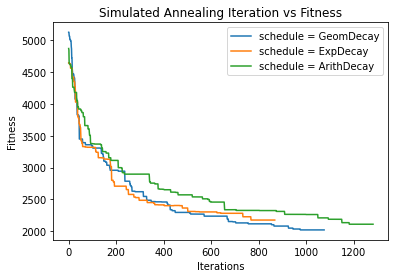

In [20]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='schedule = GeomDecay')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='schedule = ExpDecay')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='schedule = ArithDecay')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [21]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.08111453056335449
[ 5 12 33 23  8  4 27  7 17 14 15 24  9 39 35 10 25 31 26 32 30 19 22 11
 21  1 18 34 13 20 28 29 16  0  3 38 36 37  2  6]
2020.9980783001752


In [22]:
#SA schedule = geomdecay decay 0.75
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.75, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.0635538101196289
[ 9  6  2 36  5 20 23 30 24 19 11 38 29 33  4 27  3 16  8 32 25 31  0 12
 28 21 13 34 18  1 35 10 39 37 26 22  7 17 14 15]
2317.070730988182


In [23]:
#SA schedule = geomdecay decay 0.55
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.55, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.07537841796875
[ 7  4  3 16  5 18 13 30 24 15 14 31 32 11 29 38 39 10 35 37 26 22 27 17
  9 19 25 36  1 34 21  2  6 28 20 12 23  0 33  8]
2150.224119713741


In [7]:
#SA schedule = geomdecay decay 0.35
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.35, min_temp=1)
best_state, best_fitness, fitness_curve_pro3 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=4)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.12378835678100586
[22 11 32 37  2  6 33  0 23 12  5 28 21 18 34 13  1 36 35 10 31 24 17 14
 15  9 19 30 25 39 26 20 16  3 27  7  4  8 29 38]
1997.515757213369


In [8]:
curve_SA = fitness_curve_pro3
fitness_SA = best_fitness

In [25]:
#SA schedule = geomdecay decay 0.15
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.15, min_temp=1)
best_state, best_fitness, fitness_curve_pro4 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=5)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.033501625061035156
[39 32  8  0 23  5 34 12 27  7 29 37  2 36 38 11 26 28 21 13  6  1 18 20
 22 30 31 25  4 24 15 14 19  9 17  3 16 33 10 35]
2432.1486342405124


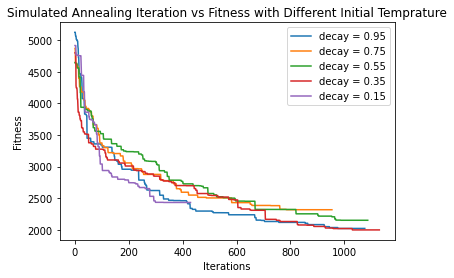

In [26]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='decay = 0.75')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='decay = 0.55')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro3))), fitness_curve_pro3[:,0], label='decay = 0.35')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro4))), fitness_curve_pro4[:,0], label='decay = 0.15')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness with Different Initial Temprature")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [29]:
#MIMIC POPSIZE = 200
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

60.27324843406677
[36 26  1  8 22  3 11 24  4 14  9 32 18 34 20  6 37 15 31  5 35 29 12 23
 38 19 39 10 25 21 13 33 28  2 17 30 27  0 16  7]
3957.789327617062


In [9]:
#MIMIC POPSIZE = 250
start = time.time()
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.mimic(problem_fit, pop_size=250, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

120.23170042037964
[22 11 38 16 17 31  9 15 26  7 19 14 27 30 39 37  6 18 21 29 13  3  4 28
 36 32  2 34  8 33  0 12  1  5 20 23 24 25 10 35]
3369.826416938213


In [10]:
curve_MIMIC = fitness_curve_pro
fitness_MIMIC = best_fitness

In [31]:
#MIMIC POPSIZE = 150
start = time.time()
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.mimic(problem_fit, pop_size=150, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

55.12095499038696
[ 5 10 14 31 26 15 36  2 12 38 20 25 30 19 17 33 35 37  0 16  8  9 24 21
 13 18 34 11 23 22  4  3  7 32  1 29 39  6 28 27]
4104.072643968579


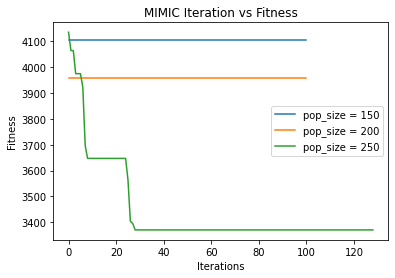

In [32]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("MIMIC Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

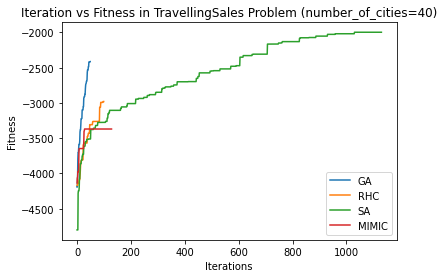

In [17]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(curve_GA))), -curve_GA[:,0], label='GA')  # ... and some more.
ax.plot(range(0,len(list(curve_RHC))), -curve_RHC[:,0], label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(curve_SA))), -curve_SA[:,0], label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(curve_MIMIC))), -curve_MIMIC[:,0], label='MIMIC')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Iteration vs Fitness in TravellingSales Problem (number_of_cities=40)")  # Add a title to the axes.
ax.legend()  # Add a legend.

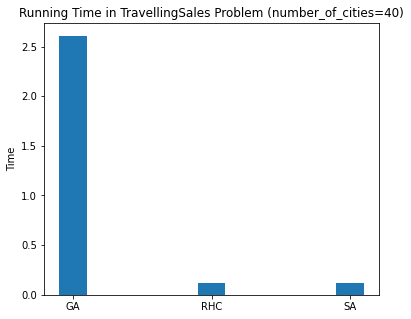

In [20]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA'] 
runtime_list = [2.606696605682373,0.11966395378112793,0.12378835678100586]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Time")
plt.title("Running Time in TravellingSales Problem (number_of_cities=40)")
plt.show()

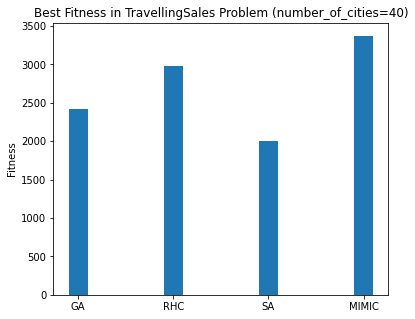

In [21]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA','MIMIC'] 
runtime_list = [fitness_GA,fitness_RHC,fitness_SA,fitness_MIMIC]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Fitness")
plt.title("Best Fitness in TravellingSales Problem (number_of_cities=40)")
plt.show()